<a href="https://colab.research.google.com/github/DaudRasheed/Cats_Vs_Dogs_Classifier/blob/main/catsVdogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 202MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
#CNN Model

model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

#Configuring Model

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#**Training Model**

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.4949 - accuracy: 0.5781 - val_loss: 0.6314 - val_accuracy: 0.6496
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5952 - accuracy: 0.6923 - val_loss: 0.6021 - val_accuracy: 0.7076
Epoch 3/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5035 - accuracy: 0.7567 - val_loss: 0.4700 - val_accuracy: 0.7822
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4302 - accuracy: 0.8038 - val_loss: 0.4386 - val_accuracy: 0.7922
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3687 - accuracy: 0.8388 - val_loss: 0.5802 - val_accuracy: 0.7126
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2977 - accuracy: 0.8759 - val_loss: 0.5047 - val_accuracy: 0.7994
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2204 - accuracy: 0.9101 - val_loss: 0.5095 - val_ac

##Before applying BatchNormalization and Dropout

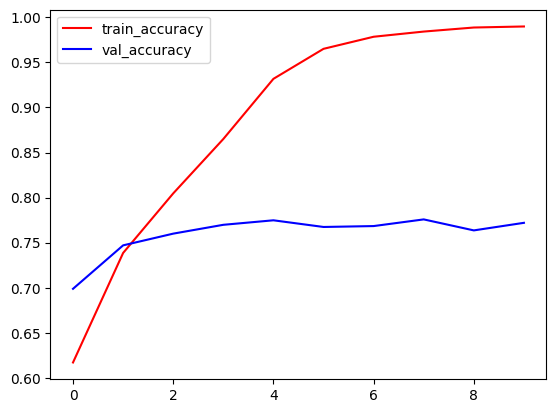

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.legend()
plt.show()

##AFTER applying BactNormalization and Dropout

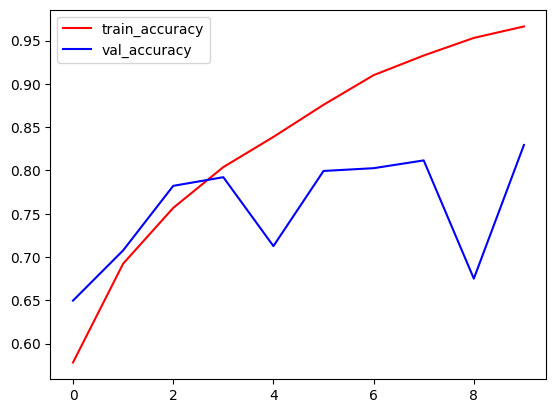

In [20]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.legend()
plt.show()

#Testing on unseen images

In [21]:
import cv2

In [32]:
test_img = cv2.imread('/content/puppy.jpg')

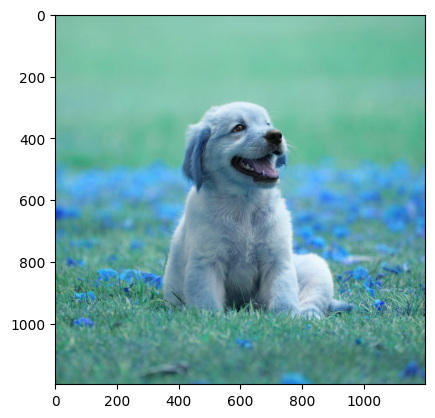

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(1197, 1200, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape(1,256,256,3)

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

##Testing on Cat (0) image

In [40]:
test_img = cv2.imread('/content/3683.jpg')

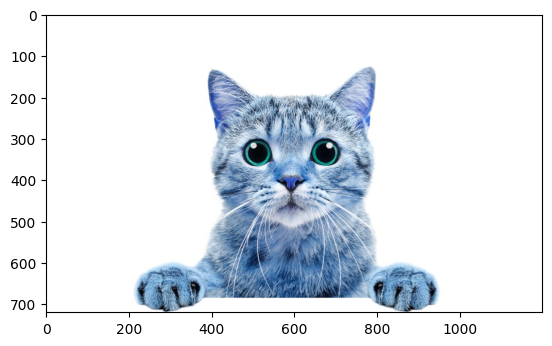

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(720, 1200, 3)

In [44]:
test_img = cv2.resize(test_img,(256,256))

In [45]:
test_input=test_img.reshape(1,256,256,3)

In [47]:
model.predict(test_input)

1/1 [==============================] - 0s 68ms/step


array([[0.]], dtype=float32)